# Introduction to Programming, Data Visualization, & Model Fitting with Python

# - Visualization in Python

#### Developed by:   A. Fahim and B. Vegetabile, University of California, Irvine

This notebook is a supplement to the workshop "Introduction to Programming, Data Visualization, & Model Fitting with Python"

# Getting Started

We get started as usual.  Often these are the first two lines in your workbook or script when you're analzing data.

```python
import numpy as np
import pandas as pd
```

For visualization we will add two new lines
```python
import matplotlib.pyplot as plt 
%matplotlib inline
```
The last command is **magic** command in jupyter notebooks.  It essentially tells the Jupyter notebook that you want to render the images we're creating under the block of code which has just run.  This is all I'll mention about magic commands for the day.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting with Pandas

To get out of the gate running with minimal effort, let's start by bringing in the data again that we just merged into an object we provide the identifier `baseball`.  Perform a `describe` on the data again to see what it does when there are missing values.

Don't forget where you output the file to and its name.

In [2]:
playerInfo = pd.read_csv('C:/Users/Arjang/Desktop/Fullerton/2018/Codes/data/playerInfo.csv')
performanceInfo = pd.read_csv('C:/Users/Arjang/Desktop/Fullerton/2018/Codes/data/performanceInfo.csv')
baseball = playerInfo.merge(performanceInfo, on='PlayerID', how='outer', sort=True)
baseball.head()
baseball.describe()

PlayerID       Salary         AVG         OBP        Runs  \
count  337.000000   337.000000  313.000000  313.000000  313.000000   
mean   169.000000  1248.528190    0.257597    0.324032   46.009585   
std     97.427751  1240.013309    0.038130    0.044900   28.713604   
min      1.000000   109.000000    0.111000    0.138000    0.000000   
25%     85.000000   230.000000    0.238000    0.298000   22.000000   
50%    169.000000   740.000000    0.259000    0.322000   41.000000   
75%    253.000000  2150.000000    0.281000    0.354000   67.000000   
max    337.000000  6100.000000    0.457000    0.486000  133.000000   

             Hits     Doubles     Triples          HR         RBI       Walks  \
count  313.000000  313.000000  313.000000  313.000000  313.000000  313.000000   
mean    91.536741   16.504792    2.271565    8.968051   43.511182   34.603834   
std     51.264767   10.442186    2.519105    9.231649   29.462613   24.319249   
min      2.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     51.000000    8.000000    0.000000    1.000000   20.000000   15.000000   
50%     88.000000   15.000000    2.000000    6.000000   38.000000   30.000000   
75%    135.000000   23.000000    3.000000   15.000000   65.000000   49.000000   
max    216.000000   49.000000   15.000000   44.000000  133.000000  108.000000   

               SO          SB        Errs  
count  313.000000  313.000000  313.000000  
mean    56.367412    7.811502    6.750799  
std     33.445744   10.936571    5.909728  
min      1.000000    0.000000    0.000000  
25%     31.000000    1.000000    3.000000  
50%     50.000000    3.000000    5.000000  
75%     77.000000   11.000000    9.000000  
max    152.000000   72.000000   31.000000

### Univariate Summary Plots

Let's start to see what plotting capabilities are naturally available to us from pandas without any other plotting libraries. One of the most common plotting univariate techniques is the `histogram` which provides the distribution of the values of a variable.  

Let's select `baseball.Salary` and begin to make a plot

First we call

```python
baseball.Salary.hist()
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salaries of Baseball Players from 1992')
plt.show()
```
This builds a basic plot from the salary data and adds labels to the `x` and `y` axes, as well as a title.  The `plt` functionality is how you can add extra features to the plot.  The command `plt.show()` is used when everything is finished to display the plot.  (Note that it will plot without it but a bar of text will be displayed above the plot like `<matplotlib.text.Text at 0x11aa68650>`)



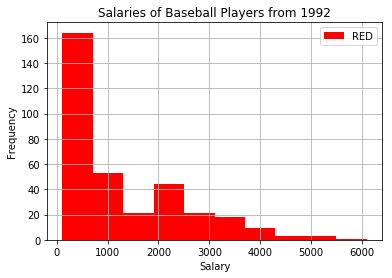

In [5]:
baseball.Salary.hist()
baseball.Salary.hist(color=['red'], label=['RED'])
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salaries of Baseball Players from 1992')
plt.legend()
plt.show()

### Mini Exercise

Pandas additionally provides the box plot through the chaining of commands on a pandas DataFrame.  Try to create a `boxplot` of the salary data.  Additionally use the `help()` command to see how the function works and try to create a box plot of just the hits, doubles, triples and home runs (HR).  

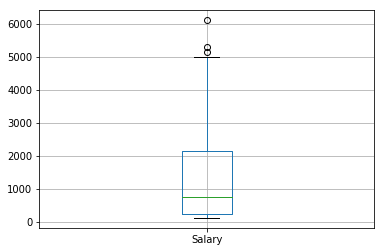

In [6]:
#help(baseball.boxplot)
baseball.boxplot(['Salary'])

Finally there is another univarviate plot which I often find helpful and that is a density estimate plot.  This is essentially, without getting into the details, a smoother over a histogram plot and often reveals a bit more information of the density than the histogram. 

We can do that by using

```python
baseball.Salary.plot.kde()
plt.xlabel('Salary')
plt.show()
```

`kde` stands for kernel density estimate.

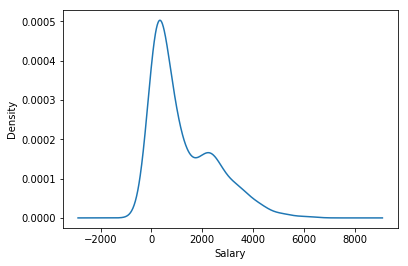

In [8]:
baseball.Salary.plot.kde()
plt.xlabel('Salary')
plt.show()

With this view of the data it looks as if the data may actually be multi-modal. 

### Bivariate Plotting - Scatter Plots

Next we introduce the scatter plot on simple pandas DataFrames.  A scatter plot method is attached to the original DataFrame in the following way

```python
DataFrame.plot.scatter(x=Column1, y=column2)
```

We can quickly create a plot using the following commands 

```python
baseball.plot.scatter(x = 'HR', y = 'Salary')
plt.show()
```

This would allow us to ask the question was a players home run output related to his salary in 1992.  

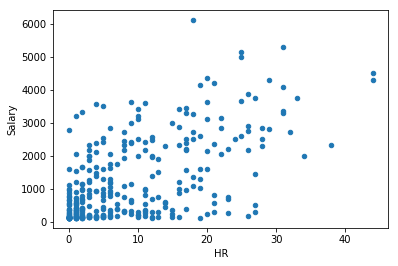

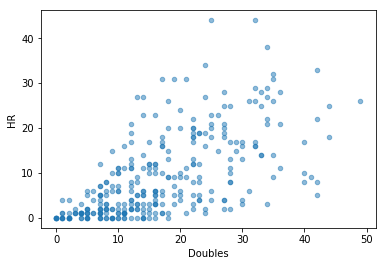

In [11]:
baseball.plot.scatter(x = 'HR', y = 'Salary')
plt.show()

baseball.plot.scatter(x = 'Doubles', y = 'HR', alpha=0.5)
plt.show()

### Creating Subplots on the Same Figure and Setting Axis Limits

Creating subplots takes a little bit more effort, but mainly it boils down to defining a subplot region and a grid layout.  These values are then passed to a `fig` and `axes` identifer which are used to position specific plots.  Additionally in order to change the properties of many of the plots you can pass the actual plot to an identifier so that you can change things like x and y limits later.... Without going into too much detail here is an example.

```python
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

plt1 = baseball.Salary.plot.kde(ax=axes[0,0])
plt1.set_xlim([0,7000])

plt2 = baseball.plot.scatter(x='Hits', y='Salary', ax=axes[0,1])
plt2.set_xlim([0, 250])
plt2.set_ylim([0,7000])

plt3 = baseball.Hits.plot.kde(ax=axes[1,1])
plt3.set_xlim([0, 250])

axes[1,0].axis('off')

plt.show()
```

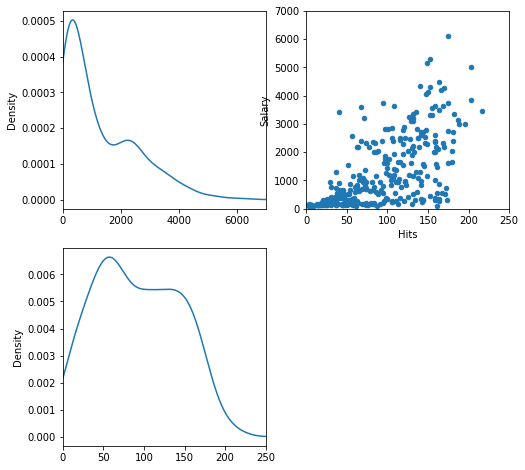

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

plt1 = baseball.Salary.plot.kde(ax=axes[0,0])
plt1.set_xlim([0,7000])

plt2 = baseball.plot.scatter(x='Hits', y='Salary', ax=axes[0,1])
plt2.set_xlim([0, 250])
plt2.set_ylim([0,7000])

plt3 = baseball.Hits.plot.kde(ax=axes[1,0])
plt3.set_xlim([0, 250])

axes[1,1].axis('off')

plt.show()

### Exercise - Creating Plots with Iris Data

This is a little bit more advanced than what has been shown, but it combines some of the skills that were learned earlier. Load the iris data and investigate the relationship between `PetalLegth` and `PetalWidth` by type.  

Here is a general template for what you need to do:

- As with the last worksheet you're going to want to use the `unique` function to get the Iris types and then iterate through those to create plots where each type has a different color.
- Since there are three iris types you may want to create a subplot of two rows and three columns to plot the densities.  
- 
If you're compelled investigate how to add a legend to the plots.  

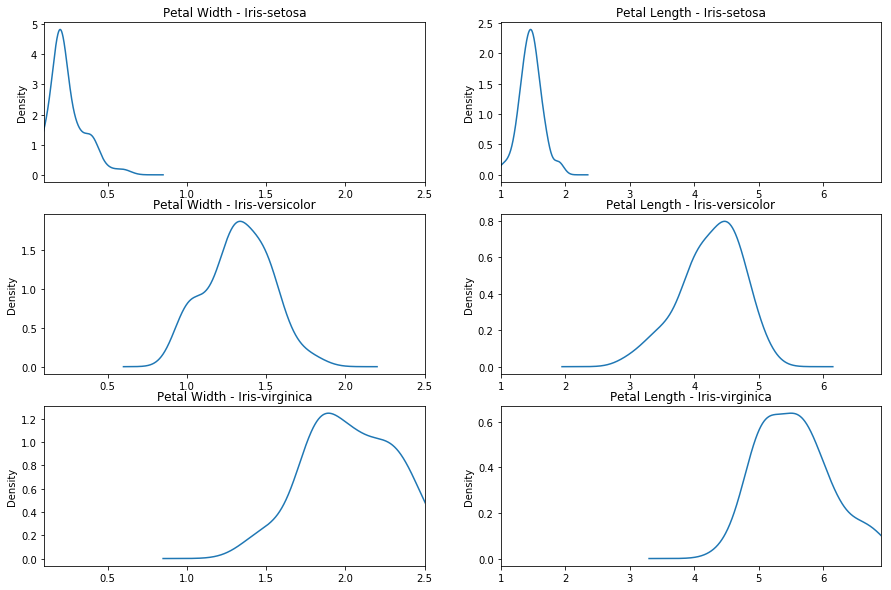

In [18]:
iris = pd.read_csv('C:/Users/Arjang/Desktop/Fullerton/2018/Codes/data/iris.data')
petals = iris[['PetalWidth', 'PetalLength', 'IrisType']]
unique_iris = petals.IrisType.unique()

# Finding axis limits
width_lims = petals.PetalWidth.min(), petals.PetalWidth.max()
length_lims = petals.PetalLength.min(), petals.PetalLength.max()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
for i, iris_type in enumerate(unique_iris):
    type_mask = petals.IrisType == iris_type
    
    plt_width = petals[type_mask].PetalWidth.plot.kde(ax=axes[i, 0])
    plt_width.set_xlim(width_lims)
    plt_width.set_title('Petal Width - ' + iris_type)
    
    plt_length = petals[type_mask].PetalLength.plot.kde(ax=axes[i, 1])
    plt_length.set_xlim(length_lims)
    plt_length.set_title('Petal Length - ' + iris_type)


# Introducing Another Library - Seaborn

Python plotting is incredibly simple but is not always the best to look at especially when we're in a world of new and exciting data visualizations all the time.  

The package `seaborn` provides very appealing visuals.  Similiar to the way in which `pandas` was created on top of `numpy` to give more functionality, `seaborn` was built on top of `matplotlib` the plotting package that we've been working with so far today.  

I won't dive too deep into this package, but did want to highlight that it exists for those of you that want more striking presentations of your data right out of the box. 

The common identifier for `seaborn` is `sns`... so

```python
import seaborn as sns
```

In [ ]:
import seaborn as sns

### One of my favorite exploratory plots - Paired Scatter Plots

One of the reasons for introducing this package is to highlight one of my favorite exploratory methods for visualizing the relationship between data.  

Below I've included a sample piece of code which should create a paired plot for the baseball data.  

```python
hit_performance = baseball[['Hits', 'Doubles', 'Triples', 'HR', 'Salary']].dropna()

sns.set(style="white")
baseball_grid = sns.PairGrid(hit_performance, diag_sharey=False)
baseball_grid.map_lower(sns.kdeplot, cmap="Blues_d")
baseball_grid.map_upper(plt.scatter)
baseball_grid.map_diag(sns.kdeplot, lw=3)
plt.show()
```

Unfortunately I don't often plot in `seaborn`, so I can't answer too many questions about syntax structure of the plotting language.  The tutorial can be found here: http://seaborn.pydata.org/tutorial.html

It is definitely worth learning a plotting library which creates visually pleasing graphics.

In [ ]:
hit_performance = baseball[['Hits', 'Doubles', 'Triples', 'HR', 'Salary']].dropna()
sns.set(style="white")
baseball_grid = sns.PairGrid(hit_performance, diag_sharey=False)
baseball_grid.map_lower(sns.kdeplot, cmap="Blues_d")
baseball_grid.map_upper(plt.scatter)
baseball_grid.map_diag(sns.kdeplot, lw=3)
plt.show()

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
##### Iris Plot Solution

In [ ]:
iris = pd.read_csv('C:/Users/Arjang/Desktop/Fullerton/2018/Codes/data/iris.data')
iris.head()
unique_iris = iris.IrisType.unique()
#print unique_iris
iris_mask = iris.IrisType == unique_iris[0]
mask_0 = iris[iris_mask]

iris_mask = iris.IrisType == unique_iris[1]
mask_1 = iris[iris_mask]

iris_mask = iris.IrisType == unique_iris[2]
mask_2 = iris[iris_mask]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,5))

plt1 = mask_0.PetalLength.plot.kde(ax=axes[0,0])
plt2 = mask_0.PetalWidth.plot.kde(ax=axes[1,0])

plt3 = mask_1.PetalLength.plot.kde(ax=axes[0,1])
plt4 = mask_1.PetalWidth.plot.kde(ax=axes[1,1])

plt5 = mask_2.PetalLength.plot.kde(ax=axes[0,2])
plt6 = mask_2.PetalWidth.plot.kde(ax=axes[1,2])

plt.show()



iris = pd.read_csv('C:/Users/Arjang/Desktop/Fullerton/2018/Codes/data/iris.data')
petals = iris[['PetalWidth', 'PetalLength', 'IrisType']]
unique_iris = petals.IrisType.unique()

# Finding axis limits
width_lims = petals.PetalWidth.min(), petals.PetalWidth.max()
length_lims = petals.PetalLength.min(), petals.PetalLength.max()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
for i, iris_type in enumerate(unique_iris):
    type_mask = petals.IrisType == iris_type
    
    plt_width = petals[type_mask].PetalWidth.plot.kde(ax=axes[i, 0])
    plt_width.set_xlim(width_lims)
    plt_width.set_title('Petal Width - ' + iris_type)
    
    plt_length = petals[type_mask].PetalLength.plot.kde(ax=axes[i, 1])
    plt_length.set_xlim(length_lims)
    plt_length.set_title('Petal Length - ' + iris_type)